In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('sklearn', sklearn.__version__)

pandas 2.2.2
numpy 1.26.4
sklearn 1.5.1


In [3]:
#Reading the dataset into the notebook
df = pd.read_csv('UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
#Checking the first few rows of the dataset
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
#Checking the shape
df.shape

(962, 2)

# Exploring the dataset

## Exploring the 'Category' column

In [8]:
#Exploring the 'Category' column
df.Category

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [9]:
counts = df.Category.value_counts()
counts

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

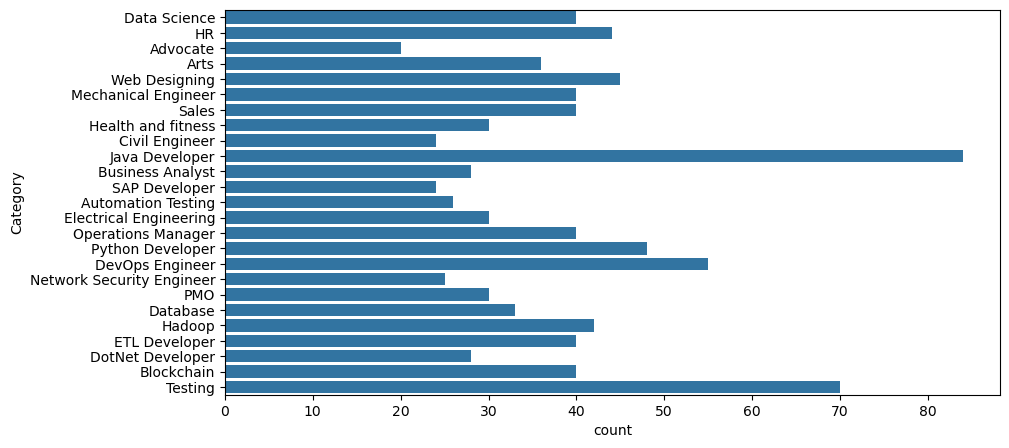

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(df['Category'])
plt.show()

### Findings

- The highest number of resumes found in the dataset are of the 'Java Developer' category.
- Next highest would be 'Testing'

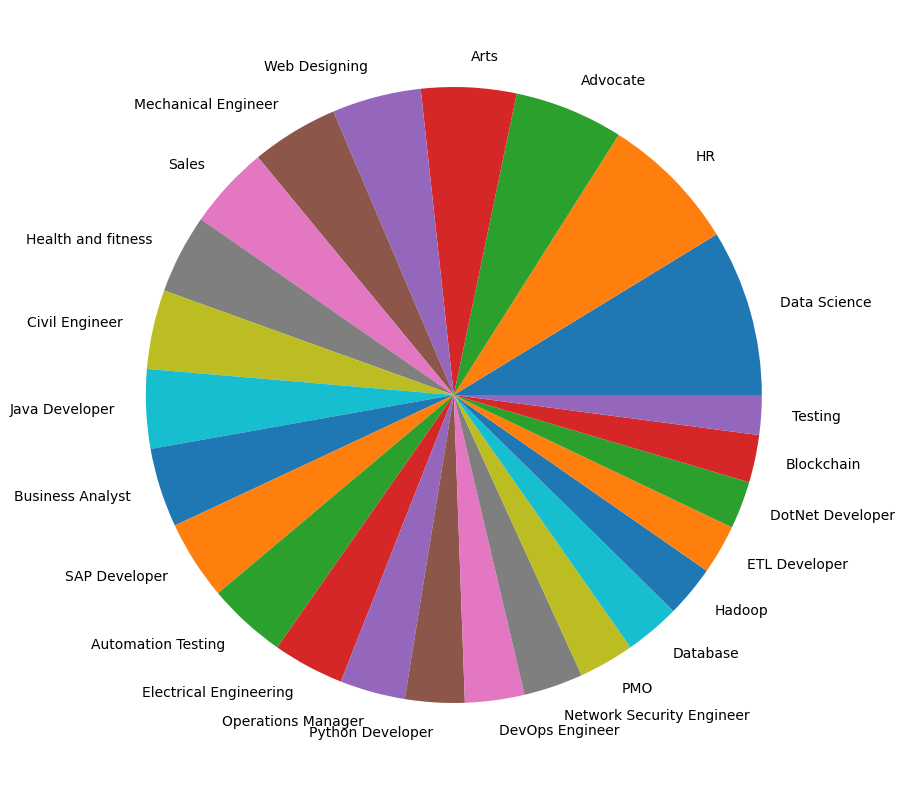

In [12]:
#Let's represent it in a pie chart
plt.figure(figsize=(15,10))
plt.pie(counts, labels = df.Category.unique())
plt.show()

## Exploring the 'Resume' column

In [14]:
# Checking the 1st resume
df.Category

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [15]:
df.Category[0]

'Data Science'

In [16]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

- This is the resume of the 1st category in the dataset i.e., the resume of the 1st data science category
- As you can see there are a lot of unnecessary data in the resume like '*', '\r\n' and so on. Hence, we need to clean this data.

## Cleaning the 'Resume' data
- Cleaning URLs
- Clearing Hashtags
- Clearing mentions
- Clearing special letters
- Clearing punctuations

In [19]:
# Using regular expression 
import re
def cleanres(txt):
    cleantxt = re.sub(r'http\S+\s?', '', txt) #To remove links 'https.example.com'
    cleantxt = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', cleantxt) #To remove emails
    cleantxt = re.sub(r'\s?#\w+', '', cleantxt) #To remove Hanshtags
    cleantxt = re.sub(r'\s?@\w+', '', cleantxt) #To remove 
    #cleantxt = re.sub(r'[^A-Za-z0-9\s]', '', cleantxt)
    cleantxt = re.sub(r'[^\w\d\s]', '', cleantxt)
    cleantxt = re.sub(r'\s+', ' ', cleantxt)
    return cleantxt

In [20]:
cleanres("Check out this link: https://example.com and also visit http://example.org for more info. and follow gurjot@gmail.com and #follow me and @gurjot these are special char @#?$%&* \r\n")

'Check out this link and also visit for more info and follow and me and these are special char '

In [21]:
cleanres("Check out this link: https://example.com and also visit http://example.org for more info. and follow gurjot@gmail.com and #follow me and @gurjot these are special char @#?$%&* \r\n")

'Check out this link and also visit for more info and follow and me and these are special char '

In [22]:
df['Resume'] = df['Resume'].apply(lambda x: cleanres(x))

In [23]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revi

## Turning 'Category' column to numbers using LabelEncoder

In [25]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â R â Python â SAP HANA â Tableau â SAP...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills â Proficient in MS office Word...
958,Testing,â Willingness to accept the challenges â Posit...
959,Testing,PERSONAL SKILLS â Quick learner â Eagerness to...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [26]:
# As the 'Category' column is in text format, for machine learning we need to use label encoder to convert it into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [28]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills â R â Python â SAP HANA â Tableau â SAP...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills â Proficient in MS office Word...
958,23,â Willingness to accept the challenges â Posit...
959,23,PERSONAL SKILLS â Quick learner â Eagerness to...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [29]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Resume'])
Reqtxt = tfidf.transform(df['Resume'])

In [32]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills â R â Python â SAP HANA â Tableau â SAP...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills â Proficient in MS office Word...
958,23,â Willingness to accept the challenges â Posit...
959,23,PERSONAL SKILLS â Quick learner â Eagerness to...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [33]:
Reqtxt

<962x7937 sparse matrix of type '<class 'numpy.float64'>'
	with 164491 stored elements in Compressed Sparse Row format>

## Splitting

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Reqtxt, df['Category'], test_size=0.2, random_state=42)

In [37]:
X_train.shape

(769, 7937)

In [38]:
X_test.shape

(193, 7937)

## Model Training

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
cf = OneVsRestClassifier(KNeighborsClassifier())
cf.fit(X_train, y_train)
y_pred = cf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9844559585492227


## Saving the data

In [43]:
import pickle

In [44]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(cf, open('cf.pkl', 'wb'))

## Loading the data

In [46]:
# Loading the trained classifier
l_cf = pickle.load(open('cf.pkl', 'rb'))

In [47]:
sm_res = "I Other Skills Course/Skill Name Board Year Of Passing Grade Intermediate Grade Drawing Art Examination Committee, 2011 B Examination Maharashtra State I Academic Programme Detail National Service Scheme (Camp): - Sponsored By Government of India Ministry Of Youth Affairs And Sports, New Delhi & North Maharashtra University, Jalgaon. I Strengths Ã¢Â€Â¢ Ability to Learn From Mistakes. * Honesty Ã¢Â€Â¢ Ready to accept challenges and responsibilities. * Quick learning, adaptability, confidence. I Declaration I /201 Your faithfully, Pia .. . . ( Jetalal Hiralal Gorbanjara)Education Details May 2010 HSC  Nashik, Maharashtra State BoardJune 2008 SSC  Nashik, Maharashtra State Board Asst.Professor Asst.Professor Skill Details Company Details company - Kisan Arts description - - Total Work Experience ( In Months) Sr.       Name of Organization / College        Designation              Working Period          Total Experience No.		( In Months) From            To 1.        Kisan Arts, Commerce & Science        Asst.Professor      20/07/2015    31/05/2016        10 Months Sr. College, Parola Dist- Jalgaon, {Political Sci.) Maharashtra company - Bahadarpur, Tai- Parola Dist description - "

In [134]:
# Cleaning the input resume
cleaned_res = cleanres(result)

In [136]:
cleaned_res

'Gurjot Gill nA Motivated and detailoriented graduate with a strong foundation in data analysis statistical modeling and data visualization Skillednin problemsolving data manipulation and process optimization with proﬁciency in Python SQL and Excel Eager to leveragenanalytical skills to provide actionable insights and drive streamline processes and contribute to the companys success through datandriven decisionmaking n9642888895 nBangalore nlinkedincomingurjotsinghgill291000 nEDUCATION nBachelors of Computer Application nGITAM University n2019 2022n n nVisakhapatnam nObject orientednProgramming DatabasenManagement System WebnDevelopment PythonnC Java nAdvanced Certiﬁcate Program in DatanScience nIIIT Bangalore n2023 Presentn n nBangalore nSKILLS nPython nMySQL nPyCharm nFlask nPySpark nAWS nPower BI nPandas nNumpy nTensorFlow nEDA nETL nHadoop nS3 nEC2 nStatsModel nExcel nMatplotlib nSeaborn nRegex nNLTK nStreamlit nWebsite designing nContent writing nPERSONAL PROJECTS nPredicting the 

In [138]:
# Transforming the cleaned resume using the trained tfidf vectorizer

inp_feature = tfidf.transform([cleaned_res])

In [140]:
# Predicting using the loaded classifier
prediction_id = l_cf.predict(inp_feature)[0]

In [52]:
# Mapping the category with the prediction ID

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
    }

In [142]:
# Printing the category

category_name = category_mapping.get(prediction_id, 'unknown')
print('Predicted ID is: ', category_name)
print(prediction_id)

Predicted ID is:  Data Science
6


In [102]:
from PyPDF2 import PdfReader

In [116]:
reader = PdfReader("Gurjot Gill - Resume.pdf")
res = []
for page in reader.pages:
    res.append(page.extract_text())

In [118]:
res

["Gurjot Gill \nA Motivated and detail-oriented graduate with a strong foundation in data analysis, statistical modeling, and data visualization. Skilled\nin problem-solving, data manipulation, and process optimization, with proﬁciency in Python, SQL, and Excel. Eager to leverage\nanalytical skills to provide actionable insights and drive, streamline processes, and contribute to the company’s success through data-\ndriven decision-making. \ngurjotg1@gmail.com \n9642888895 \nBangalore \nlinkedin.com/in/gurjot-singh-gill291000 \nEDUCATION \nBachelor's of Computer Application \nGITAM University \n2019 - 2022\n, \n \nVisakhapatnam \nObject oriented\nProgramming, Database\nManagement System, Web\nDevelopment, Python,\nC++, Java. \nAdvanced Certiﬁcate Program in Data\nScience \nIIIT Bangalore \n2023 - Present\n, \n \nBangalore \nSKILLS \nPython \nMySQL \nPyCharm \nFlask \nPySpark \nAWS \nPower BI \nPandas \nNumpy \nTensorFlow \nEDA \nETL \nHadoop \nS3 \nEC2 \nStatsModel \nExcel \nMatplotlib 

In [122]:
result = ','.join([str(res) for items in res])
print(result)

["Gurjot Gill \nA Motivated and detail-oriented graduate with a strong foundation in data analysis, statistical modeling, and data visualization. Skilled\nin problem-solving, data manipulation, and process optimization, with proﬁciency in Python, SQL, and Excel. Eager to leverage\nanalytical skills to provide actionable insights and drive, streamline processes, and contribute to the company’s success through data-\ndriven decision-making. \ngurjotg1@gmail.com \n9642888895 \nBangalore \nlinkedin.com/in/gurjot-singh-gill291000 \nEDUCATION \nBachelor's of Computer Application \nGITAM University \n2019 - 2022\n, \n \nVisakhapatnam \nObject oriented\nProgramming, Database\nManagement System, Web\nDevelopment, Python,\nC++, Java. \nAdvanced Certiﬁcate Program in Data\nScience \nIIIT Bangalore \n2023 - Present\n, \n \nBangalore \nSKILLS \nPython \nMySQL \nPyCharm \nFlask \nPySpark \nAWS \nPower BI \nPandas \nNumpy \nTensorFlow \nEDA \nETL \nHadoop \nS3 \nEC2 \nStatsModel \nExcel \nMatplotlib 